<a href="https://colab.research.google.com/github/FGalvao77/others-knowledge-in-python-for-data-science/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN
- O que é o KNN?
    
    O algoritmo **KNN** (`K-nearest neighbors`, ou `“K-vizinhos mais próximos”`) é um dos algoritmos mais utilizados em modelos de Machine Learning e, também é um dos mais simples e de fácil implementação, pode ser usado tanto para classificação como para regressão.

Ao contrário dos outros algoritmos ele não constrói um modelo (como por exemplo o Naive Bayes, onde ele analisa os dados é gera um modelo que será uma tabela de probabilidades), o KNN faz somente o cálculo de distância entre dois ou mais pontos. Por conta dessa característica peculiar, ele é considerado um método do tipo preguiçoso (lazy).

Portando ele tem como objetivo determinar a qual grupo uma determinada amostra vai pertencer com base nas amostras vizinhas. Para isso, ele utiliza o método matemático da `distância euclidiana`, descrita pela fórmula a seguir:

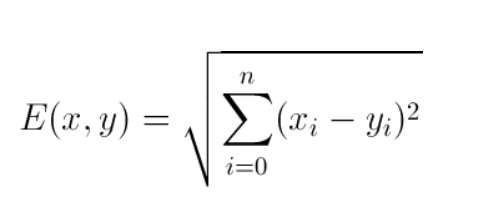

  **"Distância euclidiana (ou distância métrica) é a distância entre dois pontos, que pode ser provada pela aplicação repetida do teorema de Pitágoras. Aplicando essa fórmula como distância, o espaço euclidiano torna-se um espaço métrico."**

fonte: https://pt.wikipedia.org/wiki/Dist%C3%A2ncia_euclidiana

Para melhor entendimento, veja a figura abaixo.

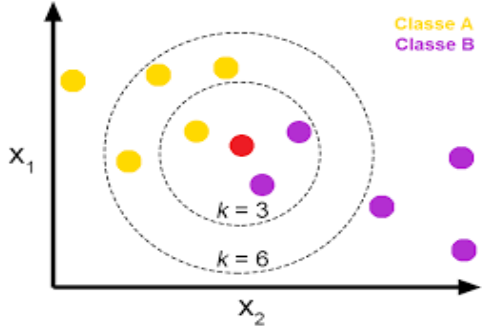

No exemplo acima temos 5 registros da classe A e 5 registros da classe B, o objetivo é saber a qual classe o novo registro (bolinha vermelha) vai pertencer.

Com este novo dado ele irar calcular a distância do mesmo com todas as amostras da base de dados de treinamento. Para isto, é necessário especificar uma valor para o parâmetro **K**, ou seja, o número de vizinhos que serã comparados. Como exemplo inicial temos `k = 3`,onde ele irar somente utilizar três amostras mais próximas para fazer a comparação.

Para este exemplo exemplo, temos como resultado:
 - dois são da classe B e somente um da classe A, portanto como existem mais vizinhos da classe B, esse novo registro pertencerá a classe B.

E se aumentarmos o nosso `k = 6`, já o resultado é:
- temos quatro registros da classe A e, dois registros da B, esse novo registro pertenecerá a classe A.

 
Tem aplicabilidade nos mais diversos segmentos de negócios, podendo ser utilizado para soluções de problemas nas áreas como finanças, saúde, ciência política, reconhecimento de imagem e reconhecimento de vídeos e etc.

Por exemplo na classificação a máquina irá dizer a que grupo determinado registro faz parte, dentro de um contexto de negócio. Já para a regressão irá nos fornecer um número/valor, por exemplo o valor de mercado de uma determinada casa que irá ser colocada a venda. Para ambos os casos o algoritmo irá analisar diversas features (colunas com dados, as quais geraram informação).

**Vamos entender como se dá o cálculo distância euclidiana**

Dado dois numeros, **11** e **25**. Para calcular a distância entre eles, devemos subtrair `11 - 25` como resultado temos **-14**. 

Pórem temos uma distância negativa e no mundo real sabemos que não existe **distância negativa**. Para isso devemos elevar o resultado ao quadrado e por fim extrair sua raiz quadrada.

Vamos para exemplo prático abaixo.



In [ ]:
# iremos importar a biblioteca matemática "math" - para realizar cálculos matemáticos
# como por exemplo a raiz quadrada "sqrt"
import math

In [ ]:
# utlizaremos os dois números acima, 11 e 25
calculo = 11 - 25
calculo

-14

In [ ]:
# iremos elevar o resultado ao quadrado
# qualquer número negativo elevado ao quadrado o seu resultado é positivo
numAoQuadrado = calculo ** 2
numAoQuadrado

196

In [ ]:
# extraindo a raiz quadrado do "numAoQuadrado" e calculando a distância euclidiana
distEucliana = math.sqrt(numAoQuadrado)
distEucliana

14.0

In [ ]:
# para simplificar tudo, podemos fazer da seguinte forma
dist = math.sqrt((11 - 25)**2)
dist

14.0

## Para realizar o cálculo dado mais de uma coordenada por exemplo:
 - a massa de uma fruta qualquer e seu índice de cor.

Portanto, queremos calcular um elemento que possui duas coordenadas (duas dimensões) e comparar com outra fruta.

Iremos utlizar o mesmo cálculo anterior para cada atributo diferente - massa e cor.

  - fruta 1, possui massa igual 5 e cor de 0.75;
  - fruta 2, massa igual 2 e cor 0.50



In [ ]:
# iremos instanciar os dados nas variáveis a e b e em uma lista em python
a = [5,0.75]
b = [2, 0.50]

Para isso é necessário, calcularmos a distância entre os nossos atributos (massa e cor) separados e depois somar os resultados e elevando ao quadrado, posteriormente extraindo sua raiz quadrada.

    distMassa = fruta1 - fruta2
    distCor = fruta1 - fruta2

    numQuad = (distMassa + disCor) * (distMassa + disCor)

    distEucl = raizQuad(numQuad)

Segue o cálculo abaixo.

In [ ]:
a = ((5 - 2) * (5 - 2))  + ((0.75 - 0.5 ) * (0.75 - 0.5)) 
math.sqrt(a)

3.010398644698074

In [ ]:
# para simplificar o nosso cálculo
res = ((5-2)**2) + ((0.75-0.50)**2)
math.sqrt(res)

3.010398644698074

> ## Vamos práticar esses conceitos com aplicação do algoritmo que se encontra na biblioteca do `sklearn`

# Iremos realizar essa prática para knn de classificação.

In [ ]:
# importando a biblioteca e o algoritmo
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# instanciando nosso algoritmo em uma variável
# com nosso classificador "n_neighbors=3" - três vizinhos mais próximo 
knn = KNeighborsClassifier(n_neighbors=3) 

Agora iremos instanciar um conjunto de dados de frutas.
   - `"fruit_data_with_colors.txt"`

In [ ]:
# importando a biblioteca para realizar a leitura do conjunto de dados
import pandas as pd

In [ ]:
# instanciando os dados na variável "data"
data = pd.read_table('fruit_data_with_colors.txt')
data.head() # visualizando as 5 primeiras linhas

fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79

In [ ]:
# verificando a quantidade de linhas e colunas
data.shape

(59, 7)

Para realizar a predição iremos utilizar somente as colunas (atributos) númericas:
 - `mass,	width,	height	e color_score`

E também iremos utlizar o rótulos (labels), que nesse caso é:
 - `fruit_label`

 Para isso iremos instanciar essas nossas variáveis.

In [ ]:
# instanciando os atributos na variável "X"
X = data[['mass', 'width', 'height', 'color_score']]

In [ ]:
# instanciando o rótulo em "y"
y = data['fruit_label']

Agora devemos dividir os dados em treino e teste. Para isso, devemos importar o `train_test_split`

In [ ]:
# importando o algoritmo da biblioteca do sklearn 
from sklearn.model_selection import train_test_split

In [ ]:
# dividindo os dados em treino e teste nas variáveis
X_train, X_test, y_train, y_test = train_test_split(X, y )
# por padrão ele divide os dados em 75% para treino e 25% para teste
# e além disso a técnica "train_test_split" divide e embaralha os dados

In [ ]:
# realizando o treinamento do nosso modelo
knn.fit(X_train, y_train) # valores de treino

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# avaliando o modelo
knn.score(X_test, y_test) # acurácia das predições
# quanto mais próximo de 1, melhor é acurácia

0.8

Para uma boa avaliação do modelo é ideal ele possuir acima de 0.7 e/ou 0.8 (70% e 80%). 

Quando o modelo possui uma avaliação inferior, essa baixa avaliação talvez se deve pela escala das grandezas dos atributos. 

Para isso devemos balancear os dados (ré-processar os dados) e para isso é necessário aplicar a `técnica de escalar`, iremos utilizar `MinMaxScaler` para normalizar os.

In [ ]:
# importando o algoritmo
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# iremos instanciar o algoritmo na variável "mm"
mm = MinMaxScaler()

In [ ]:
# iremos utilizar a tecnica nos dados de treino para transformar-los entre 0 e 1
X_train = mm.fit_transform(X_train)
X_train # observe que os dados se encontra entre 0 e 1

array([[0.44927536, 0.5       , 0.81666667, 0.57894737],
       [0.29710145, 0.5       , 0.46666667, 0.73684211],
       [0.4057971 , 0.76470588, 0.5       , 0.        ],
       [0.26811594, 0.35294118, 0.46666667, 0.86842105],
       [1.        , 1.        , 0.81666667, 0.52631579],
       [0.13043478, 0.08823529, 0.7       , 0.42105263],
       [0.14492754, 0.05882353, 0.68333333, 0.5       ],
       [0.        , 0.02941176, 0.        , 0.68421053],
       [0.01449275, 0.05882353, 0.05      , 0.63157895],
       [0.25362319, 0.38235294, 0.6       , 0.52631579],
       [0.02173913, 0.11764706, 0.06666667, 0.65789474],
       [0.13043478, 0.02941176, 0.63333333, 0.47368421],
       [0.42028986, 0.44117647, 0.9       , 0.44736842],
       [0.13043478, 0.14705882, 0.56666667, 0.44736842],
       [0.27536232, 0.55882353, 0.46666667, 0.36842105],
       [0.34057971, 0.44117647, 0.96666667, 0.44736842],
       [0.22463768, 0.52941176, 0.58333333, 0.52631579],
       [0.31884058, 0.5       ,

In [ ]:
# realizando a transformação dos dados de teste   
X_test = mm.transform(X_test)
X_test

array([[ 0.30434783,  0.44117647,  0.56666667,  0.39473684],
       [ 0.34782609,  0.47058824,  0.48333333,  0.13157895],
       [ 0.13043478,  0.05882353,  0.53333333,  0.44736842],
       [ 0.32608696,  0.52941176,  0.6       ,  0.86842105],
       [ 0.26811594,  0.41176471,  0.48333333,  0.71052632],
       [ 0.28985507,  0.35294118,  0.51666667,  0.68421053],
       [ 0.13768116,  0.08823529,  0.63333333,  0.39473684],
       [ 0.23188406,  0.29411765,  0.51666667,  0.52631579],
       [ 0.38405797,  0.41176471,  0.81666667,  0.44736842],
       [-0.01449275,  0.        , -0.05      ,  0.68421053],
       [ 0.94927536,  0.94117647,  0.85      ,  0.52631579],
       [ 0.43478261,  0.44117647,  1.03333333,  0.44736842],
       [ 0.36231884,  0.52941176,  0.65      ,  0.63157895],
       [ 1.02173913,  1.11764706,  0.81666667,  0.5       ],
       [ 0.26086957,  0.20588235,  0.7       ,  0.44736842]])

Observe que, acima não utilizamos o `mm.fit_transform` e sim somente o `mm.transform`. 

Isso se deve que, apenas queremos que os dados de treino será utilizados para preparar o modelo.

In [ ]:
# instanciando o modelo
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# realizando o treinamento com os dados normalizados
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# avaliando novamento o modelo
knn.score(X_test, y_test)

1.0

Agora nosso modelo teve uma precisão de **100%**

In [ ]:
# para predizer os resultados
# retorna as classes que os dados de treino devem estar
knn.predict(X_test)

array([1, 1, 4, 1, 3, 3, 4, 3, 4, 2, 3, 4, 3, 3, 4])

In [ ]:
# comparando com rótulos de teste
y_test

13    1
2     1
51    4
23    1
42    3
29    3
58    4
39    3
45    4
7     2
24    3
44    4
41    3
26    3
57    4
Name: fruit_label, dtype: int64

Podemos melhorar a técnica modificando a quantidade de vizinhos, por exemplo igual a 5.

Vamos aplicar essa modificação e analisar o modelo novamente!

In [ ]:
# instanciando o modelo
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# realizando o treinamento com os dados normalizados
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# avaliando novamento o modelo
knn.score(X_test, y_test)

1.0

**O modelo apresentou mesmo resultado de acurácia que anterior.**

# Iremos realizar essa prática para knn de regressão.

In [ ]:
# importando o algoritmo
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# instanciando o algoritmo na variável "knn"
knn = KNeighborsRegressor(n_neighbors=3)

Para essa atividade iremos utilizar um dataset de preços de casas de Boston.

Dentro do próprio sklearn temos este dataset para importar.

In [ ]:
# importando o dataset
from sklearn.datasets import load_boston

In [ ]:
# instanciando o dataset importado na variável "data"    
data = load_boston()

In [ ]:
# visualizando o arquivo
data

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

**Observe que, o arquivo é um dicionário em Python.**

Para facilitar as analises, iremos instanciar o arquivo já separando os rótulos e os atributos.

Como segue abaixo.



In [ ]:
X, y = load_boston(return_X_y=True)

In [ ]:
# atributos
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
# quantidade de linhas e colunas
X.shape

(506, 13)

In [ ]:
# rótulos
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
# quantidade de linhas
y.shape

(506,)

Vamos conhecer melhor o dataset através da função...

In [ ]:
# imprimindo as informações gerais do dataset
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# importando a biblioteca para realizar a divisão do dataset em treino e teste
from sklearn.model_selection import train_test_split

In [ ]:
# aplicando a divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train

array([[6.26300e-02, 0.00000e+00, 1.19300e+01, ..., 2.10000e+01,
        3.91990e+02, 9.67000e+00],
       [1.43337e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.72920e+02, 3.06200e+01],
       [1.25790e-01, 4.50000e+01, 3.44000e+00, ..., 1.52000e+01,
        3.82840e+02, 4.56000e+00],
       ...,
       [9.06800e-02, 4.50000e+01, 3.44000e+00, ..., 1.52000e+01,
        3.77680e+02, 5.10000e+00],
       [4.29700e-02, 5.25000e+01, 5.32000e+00, ..., 1.66000e+01,
        3.71720e+02, 9.51000e+00],
       [1.65660e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.72800e+02, 1.41000e+01]])

In [ ]:
X_train.shape # quantidade de dados para treino

(379, 13)

In [ ]:
X_test

array([[4.64689e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.74680e+02, 1.16600e+01],
       [7.40389e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.14640e+02, 2.64000e+01],
       [6.11540e-01, 2.00000e+01, 3.97000e+00, ..., 1.30000e+01,
        3.89700e+02, 5.12000e+00],
       ...,
       [1.14320e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        3.95580e+02, 7.67000e+00],
       [5.20140e-01, 2.00000e+01, 3.97000e+00, ..., 1.30000e+01,
        3.86860e+02, 5.91000e+00],
       [2.44668e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        8.86300e+01, 1.61400e+01]])

In [ ]:
X_test.shape # quantidade de dados para teste

(127, 13)

In [ ]:
y_train.shape

(379,)

In [ ]:
y_test.shape

(127,)

In [ ]:
# realizando o treinamento do algoritmo
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [ ]:
# avaliando acurácia do modelo
knn.score(X_test, y_test)

0.541285843729626

Vamos realizar o pré-processamento dos dados através da `técnica de escalar` os dados, para isso iremos utilizar novamente o `MinMaxScaler` para termos os dados em escala normalizada.

In [ ]:
# importando a biblioteca e o algoritmo específico para essa atividade de normalização
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# instanciando o algoritmo na variável "mm"
mm = MinMaxScaler()

In [ ]:
# aplicando a divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# utlizando a tecnica nos dados de treino para transformar-los entre 0 e 1
X_train = mm.fit_transform(X_train)
X_train # observe que os dados se encontra entre 0 e 1

array([[0.10915942, 0.        , 0.64662757, ..., 0.80851064, 0.97241414,
        0.49089404],
       [0.00603688, 0.2       , 0.12866569, ..., 0.04255319, 0.97728075,
        0.17577263],
       [0.        , 0.35      , 0.0388563 , ..., 0.30851064, 0.99455343,
        0.10375276],
       ...,
       [0.00407775, 0.        , 0.37133431, ..., 0.63829787, 0.99581421,
        0.61396247],
       [0.15987725, 0.        , 0.64662757, ..., 0.80851064, 1.        ,
        0.51296909],
       [0.0072349 , 0.2       , 0.12866569, ..., 0.04255319, 0.98746785,
        0.14266004]])

In [ ]:
# realizando a transformação dos dados de teste   
X_test = mm.transform(X_test)
X_test

array([[1.36075381e-02, 0.00000000e+00, 7.00879765e-01, ...,
        2.23404255e-01, 9.15603409e-01, 7.89183223e-02],
       [6.48627820e-03, 0.00000000e+00, 7.85557185e-01, ...,
        9.14893617e-01, 9.71909829e-01, 2.59105960e-01],
       [5.51913662e-04, 4.00000000e-01, 2.89589443e-02, ...,
        7.55319149e-01, 1.00000000e+00, 1.17273731e-01],
       ...,
       [4.63562514e-04, 0.00000000e+00, 1.31598240e-01, ...,
        4.25531915e-01, 9.96721973e-01, 1.25827815e-01],
       [6.35471817e-02, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 9.96948913e-01, 4.10044150e-01],
       [2.73559210e-02, 0.00000000e+00, 7.00879765e-01, ...,
        2.23404255e-01, 2.22678905e-01, 3.97626932e-01]])

In [ ]:
# realizando o treinamento do algoritmo
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [ ]:
# avaliando acurácia do modelo
knn.score(X_test, y_test)

0.7125039883159427

In [ ]:
# instanciando o algoritmo na variável "knn" e alterando o parâmetro para "k=5"
knn = KNeighborsRegressor(n_neighbors=5)

In [ ]:
# realizando o treinamento do algoritmo
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
# avaliando acurácia do modelo
knn.score(X_test, y_test)

0.6767398082398506